<a href="https://colab.research.google.com/github/JaeHeee/Tensorflow_practice/blob/master/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # 정수 인덱스와 단어를 매핑하도록 뒤집는다.
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # 리뷰를 디코딩한다. 0,1,2 는 패딩, 문서 시작, 사전에 없음을 위한 인덱스이므로 3을 뺀다.

1646592/1641221 [==============================] - 1s 1us/step


In [6]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 원소가 0 인 행렬 만든다.
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # result[i]에서 특정 인덱스의 위치를 1로 만든다.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
model = keras.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 50ms/step - loss: 0.5105 - accuracy: 0.7974 - val_loss: 0.3911 - val_accuracy: 0.8721
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3141 - accuracy: 0.9039 - val_loss: 0.3144 - val_accuracy: 0.8831
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2311 - accuracy: 0.9266 - val_loss: 0.3131 - val_accuracy: 0.8726
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1847 - accuracy: 0.9395 - val_loss: 0.2738 - val_accuracy: 0.8911
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1491 - accuracy: 0.9535 - val_loss: 0.3203 - val_accuracy: 0.8725
Epoch 6/20
30/30 [==============================] - 2s 50ms/step - loss: 0.1279 - accuracy: 0.9593 - val_loss: 0.2888 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1028 - accuracy: 0.9704 - val_loss: 0.3243 - val_accuracy: 0.8769
Epoch 8/20
30

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

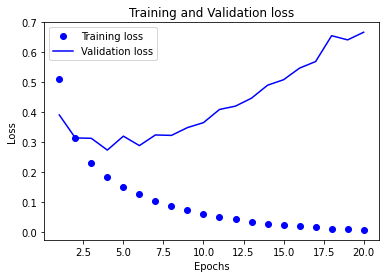

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

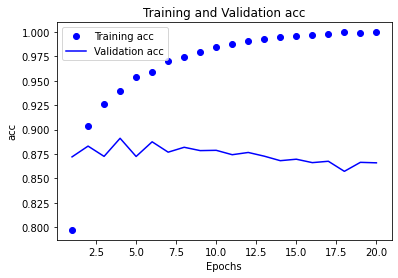

In [22]:
plt.clf() # 그래프 초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [23]:
model = keras.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 25ms/step - loss: 0.4774 - accuracy: 0.8148
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2712 - accuracy: 0.9079
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2062 - accuracy: 0.9282
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2893 - accuracy: 0.8852


In [24]:
results

[0.28929999470710754, 0.885200023651123]

In [25]:
model.predict(x_test)

array([[0.2511676 ],
       [0.999293  ],
       [0.88598627],
       ...,
       [0.13258171],
       [0.09310943],
       [0.6760965 ]], dtype=float32)